# FRAUD DEACTION APP

In [4]:
import pandas as pd
# Load the extracted CSV file
csv_path = "/mnt/data/creditcard.csv"
df = pd.read_csv((r"C:\Users\SS\Downloads\creditcard.csv.zip")
)

# Display the shape and first few rows
df.shape, df.head()


((284807, 31),
    Time        V1        V2        V3        V4        V5        V6        V7  \
 0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
 1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
 2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
 3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
 4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
 
          V8        V9  ...       V21       V22       V23       V24       V25  \
 0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
 1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
 2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
 3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
 4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   
 
   

# CLEAN THE DATA

In [5]:
# Check for missing values and duplicates
missing_values = df.isnull().sum().sum()
duplicates = df.duplicated().sum()

# Summary statistics
summary = df.describe()

# Class distribution
class_distribution = df['Class'].value_counts()

missing_values, duplicates, summary, class_distribution


(np.int64(0),
 np.int64(1081),
                 Time            V1            V2            V3            V4  \
 count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
 mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
 std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
 min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
 25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
 50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
 75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
 max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   
 
                  V5            V6            V7            V8            V9  \
 count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
 mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15  

# EDA

In [6]:
# Remove duplicate rows
df_cleaned = df.drop_duplicates()

# New shape after removing duplicates
new_shape = df_cleaned.shape

# Verify class balance again
new_class_distribution = df_cleaned['Class'].value_counts()

new_shape, new_class_distribution


((283726, 31),
 Class
 0    283253
 1       473
 Name: count, dtype: int64)

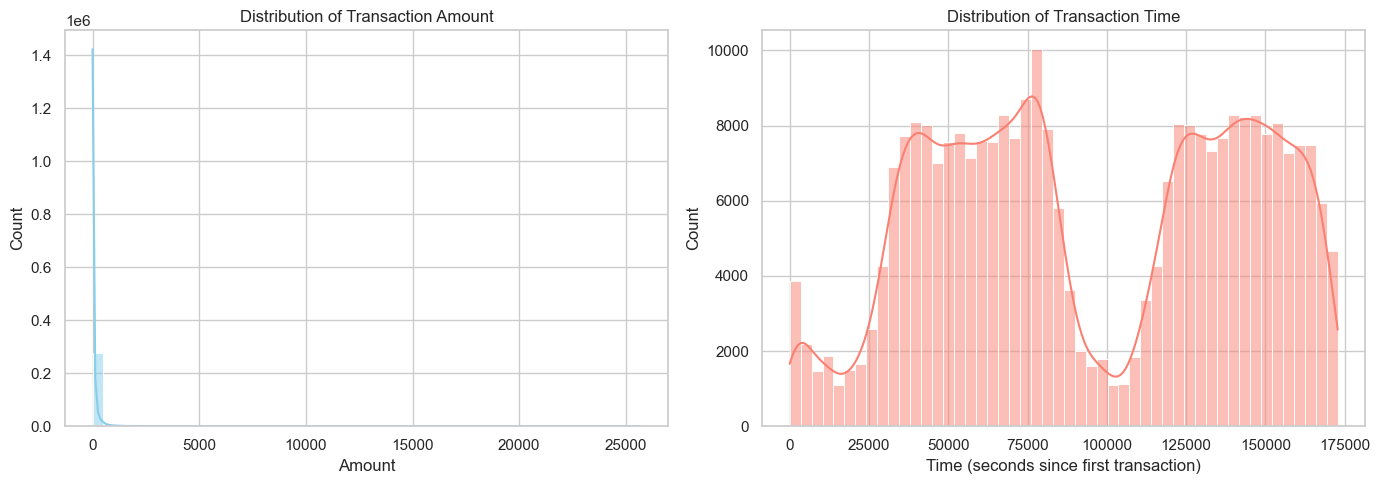

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Plot distribution of 'Amount' and 'Time'
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribution of Amount
sns.histplot(df_cleaned['Amount'], bins=50, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Transaction Amount')
axes[0].set_xlabel('Amount')

# Distribution of Time
sns.histplot(df_cleaned['Time'], bins=50, kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Distribution of Transaction Time')
axes[1].set_xlabel('Time (seconds since first transaction)')

plt.tight_layout()
plt.show()


C:\Users\SS\AppData\Local\Temp\ipykernel_12856\2281789861.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df_cleaned, palette='Set2')


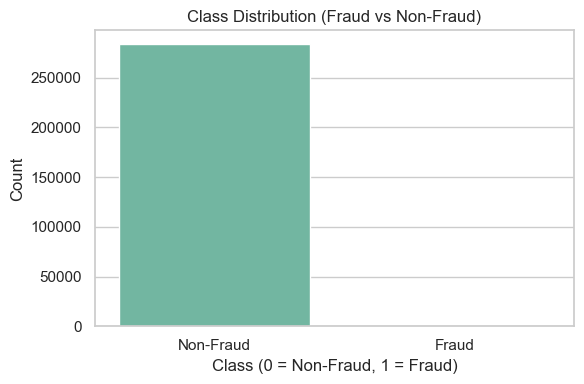

In [8]:
# Plot class imbalance
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df_cleaned, palette='Set2')
plt.title('Class Distribution (Fraud vs Non-Fraud)')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.tight_layout()
plt.show()


In [10]:
pip install imbalanced-learn



   ---------------------------------------- 0/2 [sklearn-compat]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   ---------------------------------------- 2/2 [imbalanced-learn]

Note: you may need to restart the kernel to use updated packag

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE

# Separate features and target
X = df_cleaned.drop("Class", axis=1)
y = df_cleaned["Class"]

# Scale 'Amount' and 'Time' features only
scaler = StandardScaler()
X[["Time", "Amount"]] = scaler.fit_transform(X[["Time", "Amount"]])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_res, y_train_res)

# Predict and evaluate
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

conf_matrix, report, roc_auc


(array([[82608,  2368],
        [   17,   125]]),
 {'0': {'precision': 0.9997942511346445,
   'recall': 0.9721333082282057,
   'f1-score': 0.9857697746433494,
   'support': 84976.0},
  '1': {'precision': 0.05014039310068191,
   'recall': 0.8802816901408451,
   'f1-score': 0.09487666034155598,
   'support': 142.0},
  'accuracy': 0.9719800747198007,
  'macro avg': {'precision': 0.5249673221176632,
   'recall': 0.9262074991845254,
   'f1-score': 0.5403232174924527,
   'support': 85118.0},
  'weighted avg': {'precision': 0.9982099699268997,
   'recall': 0.9719800747198007,
   'f1-score': 0.9842835223555741,
   'support': 85118.0}},
 np.float64(0.9665020579132866))

In [12]:
df_sample = df_cleaned.sample(n=20000, random_state=42)


In [15]:
pip install joblib


Note: you may need to restart the kernel to use updated packages.


In [16]:
import joblib

# Assuming you have:
# model = trained model (e.g., LogisticRegression)
# scaler = fitted StandardScaler

# Save model
joblib.dump(model, "model.joblib")

# Save scaler
joblib.dump(scaler, "scaler.joblib")


['scaler.joblib']